## import necessary libraries

In [1]:
# !pip install textblob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
warnings.filterwarnings('ignore')
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt 

###  we have been converted all resume  docs file into a single CSV file , read that csv file here

In [3]:
data = pd.read_csv('Resume_classification.csv')
data

,Resumes,Resume_category
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
...,...,...
74,\r\n Workday Integration Consultant\r\n\r...,Workday Resume
75,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resume
77,\r\nVenkateswarlu.B ...,Workday Resume


### Exploratory data analysis

In [4]:
data.shape

(79, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Resumes          79 non-null     object
 1   Resume_category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [6]:
# check for null values in data
data.isna().sum()

Resumes            0
Resume_category    0
dtype: int64

In [7]:
# check for duplicate data
data.duplicated().sum()

0

#### So, we don't have any null and duplicated data in our dataset.

In [8]:
# types of resume or categories

data['Resume_category'].unique()

array(['React JS Developer Resume', 'PeopleSoft resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [9]:
data['Resume_category'].nunique()


4

In [10]:
# number of each resumes 
print("number of React Js resumes: ",data['Resume_category'].value_counts()['React JS Developer Resume'])
print("number of PeopleSoft resume: ",data['Resume_category'].value_counts()['PeopleSoft resume'])
print("number of SQL Developer Lightning Insight Resume: ",data['Resume_category'].value_counts()['SQL Developer Lightning Insight Resume'])
print("number of Workday Resume: ",data['Resume_category'].value_counts()['Workday Resume'])


number of React Js resumes:  24
number of PeopleSoft resume:  20
number of SQL Developer Lightning Insight Resume:  14
number of Workday Resume:  21


## text Processing

### Tokenization

In [11]:
from nltk import word_tokenize
tokens = data.Resumes.map(word_tokenize)
tokens

0     [Name, :, Ravali, P, Curriculum, Vitae, Specia...
1     [SUSOVAN, BAG, Seeking, a, challenging, positi...
2     [Kanumuru, Deepak, Reddy, CAREER, OBJECTIVE, :...
3     [HARIPRIYA, BATTINA, Experience, as, UI, Devel...
4     [KAMALAKAR, REDDY, ., A, Linked, In, :, https,...
                            ...                        
74    [Workday, Integration, Consultant, Name, :, Sr...
75    [Srikanth, (, WORKDAY, hCM, Consultant, ), See...
76    [WORKDAY, |, HCM, |, FCM, Name, :, Kumar, S.S,...
77    [Venkateswarlu.B, Workday, Consultant, ., Havi...
78    [Vinay, kumar, .v, Workday, Functional, Consul...
Name: Resumes, Length: 79, dtype: object

In [12]:
data=[Text.strip() for Text in data.Resumes] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data[0:10]

['Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n

In [13]:
# convert the list to string format
data_=' '.join(data)
data_[:1000]

'Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n\

In [14]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
data_tokens=tknzr.tokenize(data_)
print(data_tokens[:100]) #returns a list of tokens

['Name', ':', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', ':', 'BE', '(', 'computer', 'science', 'and', 'Engg', ')', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'To', 'utilize', 'my', 'technical', 'skills', 'for', 'achieving', 'the', 'target', 'and', 'developing', 'the', 'best', 'performance', 'in', 'organization', '.', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'Degree', '/', 'Course', 'College', '/', 'Institute', 'University', '/', 'Board', 'Percentage', '/', 'CGPA', 'Year', 'of', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'of', 'technology', 'VTU', '6.5', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State']


In [15]:
# coverting ablove token list to string
data_tokens_text=' '.join(data_tokens)
data_tokens_text[:500]

'Name : Ravali P Curriculum Vitae Specialization : BE ( computer science and Engg ) C A R EE R OB JE CT I V E C A R EE R OB JE CT I V E To utilize my technical skills for achieving the target and developing the best performance in organization . E D U C A T ION E D U C A T ION Degree / Course College / Institute University / Board Percentage / CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 6.5 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examin'

### identify punctuation in data and remove from text 

In [16]:
no_punc_text=data_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:500]

'Name  Ravali P Curriculum Vitae Specialization  BE  computer science and Engg  C A R EE R OB JE CT I V E C A R EE R OB JE CT I V E To utilize my technical skills for achieving the target and developing the best performance in organization  E D U C A T ION E D U C A T ION Degree  Course College  Institute University  Board Percentage  CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 65 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination  Ben'

### from no_punc_text Remove URL'S from Text

In [17]:
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:500]

'Name  Ravali P Curriculum Vitae Specialization  BE  computer science and Engg  C A R EE R OB JE CT I V E C A R EE R OB JE CT I V E To utilize my technical skills for achieving the target and developing the best performance in organization  E D U C A T ION E D U C A T ION Degree  Course College  Institute University  Board Percentage  CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 65 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination  Ben'

### Now, applying tokenization on no_url_text , it will return a list of tokens

In [18]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:1000])

['Name', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', 'BE', 'computer', 'science', 'and', 'Engg', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'To', 'utilize', 'my', 'technical', 'skills', 'for', 'achieving', 'the', 'target', 'and', 'developing', 'the', 'best', 'performance', 'in', 'organization', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'Degree', 'Course', 'College', 'Institute', 'University', 'Board', 'Percentage', 'CGPA', 'Year', 'of', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'of', 'technology', 'VTU', '65', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State', 'Board', 'of', 'Technical', 'Examination', 'Bengaluru', '60', '2017', 'SSLC', 'Empress', 'girls', 'high', 'school', 'Karnataka', 'Secondary', 'Education', 'Board', '528', '2011', 'MANUAL', 'TESTING', 'SKILLS', 'Strong', 'knowledge', 'in', 'SDLC', 'concepts', 'Extensive'

In [19]:
#total length of no_url_text tokens
len(text_tokens)

56983

### removing most frequently occured words or stopwords from text_tokens

In [20]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:200])

['Name', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', 'BE', 'computer', 'science', 'Engg', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'To', 'utilize', 'technical', 'skills', 'achieving', 'target', 'developing', 'best', 'performance', 'organization', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'Degree', 'Course', 'College', 'Institute', 'University', 'Board', 'Percentage', 'CGPA', 'Year', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'technology', 'VTU', '65', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State', 'Board', 'Technical', 'Examination', 'Bengaluru', '60', '2017', 'SSLC', 'Empress', 'girls', 'high', 'school', 'Karnataka', 'Secondary', 'Education', 'Board', '528', '2011', 'MANUAL', 'TESTING', 'SKILLS', 'Strong', 'knowledge', 'SDLC', 'concepts', 'Extensive', 'knowledge', 'White', 'Box', 'Testing', 'Good', 'knowledge', 'Functio

In [21]:
# covert the whole text to lowercase
my_text=[Text.lower() for Text in no_stop_tokens]
print(my_text[:300])

['name', 'ravali', 'p', 'curriculum', 'vitae', 'specialization', 'be', 'computer', 'science', 'engg', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'to', 'utilize', 'technical', 'skills', 'achieving', 'target', 'developing', 'best', 'performance', 'organization', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'degree', 'course', 'college', 'institute', 'university', 'board', 'percentage', 'cgpa', 'year', 'passing', 'cgpacgpa', 'be', 's', 'j', 'b', 'institute', 'technology', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechnic', 'karnataka', 'state', 'board', 'technical', 'examination', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girls', 'high', 'school', 'karnataka', 'secondary', 'education', 'board', '528', '2011', 'manual', 'testing', 'skills', 'strong', 'knowledge', 'sdlc', 'concepts', 'extensive', 'knowledge', 'white', 'box', 'testing', 'good', 'knowledge', 'functio

### now, applying stemmimg on my_text

In [22]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in my_text]
print(stemmed_tokens[:100])

['name', 'ravali', 'p', 'curriculum', 'vita', 'special', 'be', 'comput', 'scienc', 'engg', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'to', 'util', 'technic', 'skill', 'achiev', 'target', 'develop', 'best', 'perform', 'organ', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'degre', 'cours', 'colleg', 'institut', 'univers', 'board', 'percentag', 'cgpa', 'year', 'pass', 'cgpacgpa', 'be', 's', 'j', 'b', 'institut', 'technolog', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechn', 'karnataka', 'state', 'board', 'technic', 'examin', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girl', 'high', 'school', 'karnataka', 'secondari', 'educ', 'board', '528', '2011', 'manual']


In [23]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(my_text))
print(doc[:100])

name ravali p curriculum vitae specialization be computer science engg c a r ee r ob je ct i v e c a r ee r ob je ct i v e to utilize technical skills achieving target developing best performance organization e d u c a t ion e d u c a t ion degree course college institute university board percentage cgpa year passing cgpacgpa be s j b institute technology vtu 65 cgpa 2021 diploma aryabharathi polytechnic karnataka state board technical examination bengaluru 60 2017 sslc empress girls high school karnataka secondary education board 528 2011 manual


### Applying Lemmatization

In [24]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['name', 'ravali', 'p', 'curriculum', 'vitae', 'specialization', 'be', 'computer', 'science', 'engg', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'I', 'v', 'e', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'I', 'v', 'e', 'to', 'utilize', 'technical', 'skill', 'achieve', 'target', 'develop', 'good', 'performance', 'organization', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'degree', 'course', 'college', 'institute', 'university', 'board', 'percentage', 'cgpa', 'year', 'pass', 'cgpacgpa', 'be', 's', 'j', 'b', 'institute', 'technology', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechnic', 'karnataka', 'state', 'board', 'technical', 'examination', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girl', 'high', 'school', 'karnataka', 'secondary', 'education', 'board', '528', '2011', 'manual']


In [25]:
clean_text=' '.join(lemmas)
clean_text[:1000]

'name ravali p curriculum vitae specialization be computer science engg c a r ee r ob je ct I v e c a r ee r ob je ct I v e to utilize technical skill achieve target develop good performance organization e d u c a t ion e d u c a t ion degree course college institute university board percentage cgpa year pass cgpacgpa be s j b institute technology vtu 65 cgpa 2021 diploma aryabharathi polytechnic karnataka state board technical examination bengaluru 60 2017 sslc empress girl high school karnataka secondary education board 528 2011 manual testing skill strong knowledge sdlc concept extensive knowledge white box test good knowledge functional testing integration test extreme knowledge system test good knowledge adhoc testing reliability test good knowledge exploratory testing good knowledge stlc concept good knowledge test case test scenario good knowledge globalization testing compatibility testing through knowledge regression test good knowledge test plan s ql s k i ll s goo k n w l e 

### Applying Text Processing On original  DataFrame

In [26]:
data = pd.read_csv("Resume_classification.csv")

In [27]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

### Converting Into Clean Resumes

In [28]:
data['Clean_Resumes'] = np.vectorize(remove_pattern)(data['Resumes'], "@[\w]*")
data.head(10)


,Resumes,Resume_category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P \n\n\n\n ...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG \n\nSeeking a challenging po...
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA \n\nExperience as UI Develop...
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A \n\nLinked In: https://www....
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
6,\r\n [pic]\r\n\r\nPROFILE\r\n\r\n Searching fo...,React JS Developer Resume,\r\n [pic]\r\n\r\nPROFILE\r\n\r\n Searching fo...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge..."
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...


### Remove Url from Clean_Resumes


In [29]:
clean_Resumes = []

for index, row in data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Resumes.split() if 'http' not in word]
    clean_Resumes.append(' '.join(words_without_links))

data['Clean_Resumes'] = clean_Resumes
data.head(10)

,Resumes,Resume_category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,Kanumuru Deepak Reddy CAREER OBJECTIVE: To sec...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
6,\r\n [pic]\r\n\r\nPROFILE\r\n\r\n Searching fo...,React JS Developer Resume,[pic] PROFILE Searching for the opportunity to...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...


In [30]:
#Remove '!' from Clean_Resumes
data = data[data['Clean_Resumes']!='']
data.head(10)

,Resumes,Resume_category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,Kanumuru Deepak Reddy CAREER OBJECTIVE: To sec...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
6,\r\n [pic]\r\n\r\nPROFILE\r\n\r\n Searching fo...,React JS Developer Resume,[pic] PROFILE Searching for the opportunity to...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...


In [31]:
# Removing Duplicate Resumes
data.drop_duplicates(subset=['Clean_Resumes'], keep=False)
data.head(10)

,Resumes,Resume_category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,Kanumuru Deepak Reddy CAREER OBJECTIVE: To sec...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
6,\r\n [pic]\r\n\r\nPROFILE\r\n\r\n Searching fo...,React JS Developer Resume,[pic] PROFILE Searching for the opportunity to...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...


In [32]:
data = data.reset_index(drop=True)
data.head(10)

,Resumes,Resume_category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,Kanumuru Deepak Reddy CAREER OBJECTIVE: To sec...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
6,\r\n [pic]\r\n\r\nPROFILE\r\n\r\n Searching fo...,React JS Developer Resume,[pic] PROFILE Searching for the opportunity to...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...


In [33]:
#Cleaning Words From Text
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('!', '',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('⇨', '',text)
    text = re.sub(':', '',text)
    text = re.sub('•', '',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [34]:
data['Clean_Resumes'] = data['Clean_Resumes'].apply(lambda x: clean_text(x))
data.head(10)

,Resumes,Resume_category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,kanumuru deepak reddy career objective to secu...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,kamalakar reddy a linked in professional summa...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
6,\r\n [pic]\r\n\r\nPROFILE\r\n\r\n Searching fo...,React JS Developer Resume,profile searching for the opportunity to brin...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu  geethika presti...
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,thirupathamma balla summary year of it experi...


In [35]:
# Removing Emoji from Clean_Resumes
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [36]:
data['Clean_Resumes']=data['Clean_Resumes'].apply(lambda x: remove_emoji(x))
data.head(10)

,Resumes,Resume_category,Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,kanumuru deepak reddy career objective to secu...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,kamalakar reddy a linked in professional summa...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
6,\r\n [pic]\r\n\r\nPROFILE\r\n\r\n Searching fo...,React JS Developer Resume,profile searching for the opportunity to brin...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu geethika prestig...
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,thirupathamma balla summary year of it experi...


### Applying Tokenization On Clean_Resumes

In [37]:
data['Tokenized_Resumes'] = data['Clean_Resumes'].apply(lambda x: nltk.word_tokenize(x))
data.head(10)

,Resumes,Resume_category,Clean_Resumes,Tokenized_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ..."
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,"[susovan, bag, seeking, a, challenging, positi..."
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,kanumuru deepak reddy career objective to secu...,"[kanumuru, deepak, reddy, career, objective, t..."
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...,"[haripriya, battina, experience, as, ui, devel..."
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,kamalakar reddy a linked in professional summa...,"[kamalakar, reddy, a, linked, in, professional..."
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,"[naveen, sadhu, title, software, developer, lo..."
6,\r\n [pic]\r\n\r\nPROFILE\r\n\r\n Searching fo...,React JS Developer Resume,profile searching for the opportunity to brin...,"[profile, searching, for, the, opportunity, to..."
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...,"[pragnya, pattnaik, expertise, having, around,..."
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu geethika prestig...,"[sarala, madasu, sarala, madasu, geethika, pre..."
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,thirupathamma balla summary year of it experi...,"[thirupathamma, balla, summary, year, of, it, ..."


In [38]:
data.drop(['Tokenized_Resumes'],axis=1,inplace=True)

### Removing stop words from Clean_Resumes and add a new column final_Clean_Resumes

In [39]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Resumes.split()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_resumes.append(' '.join(words_without_stopwords))
    
data['final_Clean_Resumes'] = cleaned_resumes
data.head(10)

,Resumes,Resume_category,Clean_Resumes,final_Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking a challenging position in ...
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective to secu...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...,haripriya battina experience as ui developer i...
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,kamalakar reddy a linked in professional summa...,kamalakar reddy a linked in professional summa...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
6,\r\n [pic]\r\n\r\nPROFILE\r\n\r\n Searching fo...,React JS Developer Resume,profile searching for the opportunity to brin...,profile searching for the opportunity to bring...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...,pragnya pattnaik expertise having around years...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu geethika prestig...,sarala madasu sarala madasu geethika prestiger...
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,thirupathamma balla summary year of it experi...,thirupathamma balla summary year of it experie...


In [40]:
Tokenized_Resume = data['final_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)


0    [name, ravali, p, curriculum, vitae, specializ...
1    [susovan, bag, seeking, a, challenging, positi...
2    [kanumuru, deepak, reddy, career, objective, t...
3    [haripriya, battina, experience, as, ui, devel...
4    [kamalakar, reddy, a, linked, in, professional...
5    [naveen, sadhu, title, software, developer, lo...
6    [profile, searching, for, the, opportunity, to...
7    [pragnya, pattnaik, expertise, having, around,...
8    [sarala, madasu, sarala, madasu, geethika, pre...
9    [thirupathamma, balla, summary, year, of, it, ...
Name: final_Clean_Resumes, dtype: object

### now, Applying Lemmatization on Abosulte_Clean_Resumes

In [41]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Resumes = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resumes.head(10)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [name, ravali, p, curriculum, vitae, specializ...
1    [susovan, bag, seeking, a, challenging, positi...
2    [kanumuru, deepak, reddy, career, objective, t...
3    [haripriya, battina, experience, a, ui, develo...
4    [kamalakar, reddy, a, linked, in, professional...
5    [naveen, sadhu, title, software, developer, lo...
6    [profile, searching, for, the, opportunity, to...
7    [pragnya, pattnaik, expertise, having, around,...
8    [sarala, madasu, sarala, madasu, geethika, pre...
9    [thirupathamma, balla, summary, year, of, it, ...
Name: final_Clean_Resumes, dtype: object

In [42]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

data['final_Clean_Resumes'] = Tokenized_Resume
data.head(10)

,Resumes,Resume_category,Clean_Resumes,final_Clean_Resumes
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking a challenging position in ...
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective to secu...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...,haripriya battina experience as ui developer i...
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,kamalakar reddy a linked in professional summa...,kamalakar reddy a linked in professional summa...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
6,\r\n [pic]\r\n\r\nPROFILE\r\n\r\n Searching fo...,React JS Developer Resume,profile searching for the opportunity to brin...,profile searching for the opportunity to bring...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...,pragnya pattnaik expertise having around years...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu geethika prestig...,sarala madasu sarala madasu geethika prestiger...
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,thirupathamma balla summary year of it experi...,thirupathamma balla summary year of it experie...


### Applying Count Vectorizer it will convert text feature into numerical features vector

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_cv=cv.fit_transform(lemmas)

In [44]:
print(cv.get_feature_names()[100:2000])

['1999', '19th', '1st', '20', '200', '2000', '20002003', '2001', '20011', '2002', '2003', '20032008', '2004', '2005', '2006', '2007', '20072008', '2008', '20082012', '2008r2', '2009', '20092011', '20092013', '2010', '2011', '20112013', '20112015', '2012', '20122014', '20122016', '2012r2', '2013', '20132017', '2014', '20142012', '20142016', '20142017', '2015', '20152017', '2016', '20162012', '2016r2', '2017', '20172019', '201784006', '2018', '2019', '2019to', '2020', '2021', '2022', '204', '21', '210', '211', '22', '2203', '2208', '224', '22nd', '23', '2301', '24', '247', '25', '25th', '26', '2601', '2627', '26387', '2705', '2728', '27th', '28', '281121', '2930', '2k15', '2k16', '2k18', '30', '300', '3015', '3031', '30th', '31', '310', '312', '32', '3233', '33', '34', '35', '36', '360', '364445', '365', '37', '38', '39', '3year', '401', '401k', '41', '411', '42', '43', '44', '46', '49600', '498', '50', '500090', '508', '51', '518', '52', '5267', '528', '53', '5312', '538', '53854', '54'

In [45]:
print(cv.get_feature_names()[:2000])

['006', '01', '012019', '0144b', '016', '017', '022019', '032', '032012', '032014', '032018', '032019', '032020', '032021', '04', '0411', '042019', '042021', '04th', '05', '0509', '052015', '052018', '052021', '05th', '06', '062019', '06th', '07', '072017', '07th', '08', '082011', '082012', '082014', '082018', '082020', '09', '092015', '092020', '10', '100', '1011', '1013', '102', '103', '104236', '106', '109', '10gr2', '10gr3', '10gr3and', '10th', '11', '1109', '112', '112013', '1131', '11gr2', '11i', '11th', '12', '121', '122', '122020', '12c', '12cr1', '12cr2', '12th', '13', '13000', '14', '15', '1502', '1508', '157', '16', '16698139', '17', '1713', '17329', '18', '188', '18c', '19', '19000', '1904', '197174', '1982', '1985', '1987', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1st', '20', '200', '2000', '20002003', '2001', '20011', '2002', '2003', '20032008', '2004', '2005', '2006', '2007', '20072008', '2008', '20082012', '2008r2', '2009'

In [46]:
print(review_cv.toarray()[100:2000])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
# shape of array
print(review_cv.toarray().shape)

(44425, 4373)


### Applyong Count vectorizer on NGrams

In [48]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [49]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())


['006', '01', '012019', '0144b', '016', '017', '022019', '032', '032012', '032014', '032018', '032019', '032020', '032021', '04', '0411', '042019', '042021', '04th', '05', '0509', '052015', '052018', '052021', '05th', '06', '062019', '06th', '07', '072017', '07th', '08', '082011', '082012', '082014', '082018', '082020', '09', '092015', '092020', '10', '100', '1011', '1013', '102', '103', '104236', '106', '109', '10gr2', '10gr3', '10gr3and', '10th', '11', '1109', '112', '112013', '1131', '11gr2', '11i', '11th', '12', '121', '122', '122020', '12c', '12cr1', '12cr2', '12th', '13', '13000', '14', '15', '1502', '1508', '157', '16', '16698139', '17', '1713', '17329', '18', '188', '18c', '19', '19000', '1904', '197174', '1982', '1985', '1987', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1st', '20', '200', '2000', '20002003', '2001', '20011', '2002', '2003', '20032008', '2004', '2005', '2006', '2007', '20072008', '2008', '20082012', '2008r2', '2009'

### now drop the unnecessary columns then we will obtain our complete cleaned data 

In [50]:
data.drop(['Resumes','Clean_Resumes'],axis=1,inplace=True)

In [51]:
data

,Resume_category,final_Clean_Resumes
0,React JS Developer Resume,name ravali p curriculum vitae specialization ...
1,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,React JS Developer Resume,kanumuru deepak reddy career objective to secu...
3,React JS Developer Resume,haripriya battina experience as ui developer i...
4,React JS Developer Resume,kamalakar reddy a linked in professional summa...
...,...,...
74,Workday Resume,workday integration consultant name sri krishn...
75,Workday Resume,srikanth workday hcm consultant seeking suitab...
76,Workday Resume,workday hcm fcm name kumar ss role workday con...
77,Workday Resume,venkateswarlub workday consultant having years...


In [52]:
# now check frequency of words
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['final_Clean_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 597), ('peoplesoft', 443), ('workday', 427), ('application', 416), ('using', 395), ('server', 347), ('data', 332), ('reports', 322), ('project', 305), ('business', 269), ('web', 241), ('database', 238), ('process', 233), ('sql', 231), ('worked', 219), ('knowledge', 210), ('system', 190), ('client', 189), ('tools', 189), ('involved', 189), ('integrations', 187), ('integration', 181), ('like', 180), ('support', 175), ('hcm', 173), ('skills', 170), ('good', 169), ('development', 163), ('creating', 163), ('team', 162), ('working', 161), ('people', 160), ('technical', 157), ('servers', 154), ('design', 152), ('services', 151), ('testing', 150), ('report', 150), ('various', 146), ('created', 146), ('role', 139), ('environment', 138), ('developer', 136), ('responsibilities', 134), ('security', 133), ('oracle', 133), ('management', 132), ('production', 130), ('issues', 129), ('studio', 127), ('work', 123), ('core', 121), ('eib', 121), ('react', 118), ('custom', 118), ('date', 1

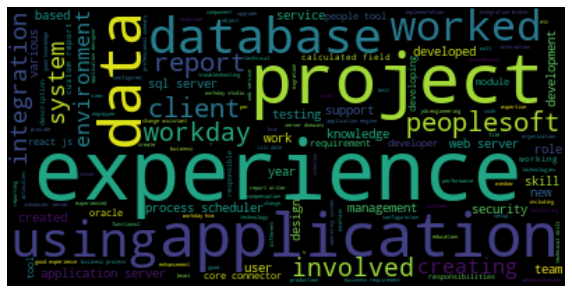

In [53]:
# generate word cloud for most frequent words
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
categories = np.sort(data['Resume_category'].unique())
categories

array(['PeopleSoft resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [55]:
data_categories = [data[data['Resume_category'] == category].loc[:, ['final_Clean_Resumes', 'Resume_category']] for category in categories]
data_categories

[                                  final_Clean_Resumes    Resume_category
 24  anubhav kumar singh core competencies scriptin...  PeopleSoft resume
 25  profile summary years of experience in impleme...  PeopleSoft resume
 26  peoplesoft database administrator gangareddy p...  PeopleSoft resume
 27  classification internal classification interna...  PeopleSoft resume
 28  priyanka ramadoss mountpleasant coonoor the ni...  PeopleSoft resume
 29  sirazuddin m bangalore india sirazuddin m bang...  PeopleSoft resume
 30  peoplesoft administrator srinivask experience ...  PeopleSoft resume
 31  peoplesoft admin varkala vikas career objectiv...  PeopleSoft resume
 32  vinod akkala peoplesoft dba admin professional...  PeopleSoft resume
 33  peoplesoft adminpeoplesoft dba ganesh alladi c...  PeopleSoft resume
 34  peoplesoft administration vivekanand sayana ca...  PeopleSoft resume
 35  arun venu experience summary experience of yea...  PeopleSoft resume
 36  personal details name pritam bisw

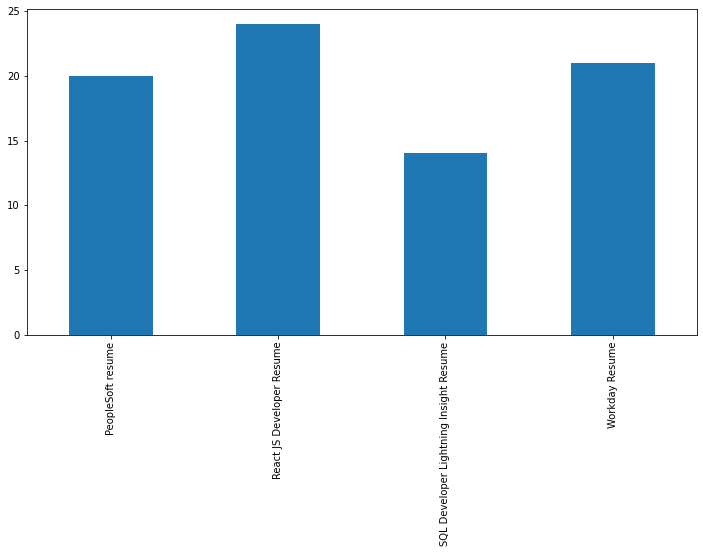

In [56]:
#plot the resumes by category wise
data['Resume_category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [57]:
#plot word cloud for each Resume Category
def wordcloud(df):
    txt = ' '.join(txt for txt in data['final_Clean_Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

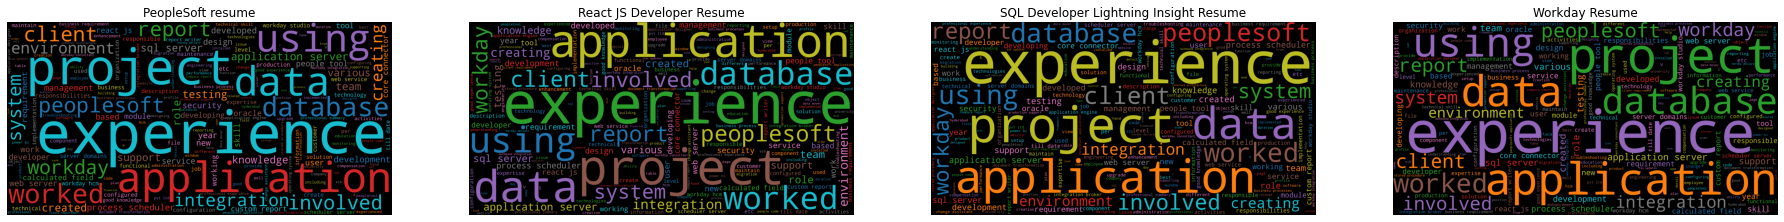

In [58]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline
plt.figure(figsize=(40, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

### Plotting the frequency graph for most frequent words in each resumes

In [59]:
def frequent_words(df):
    count = data['final_Clean_Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

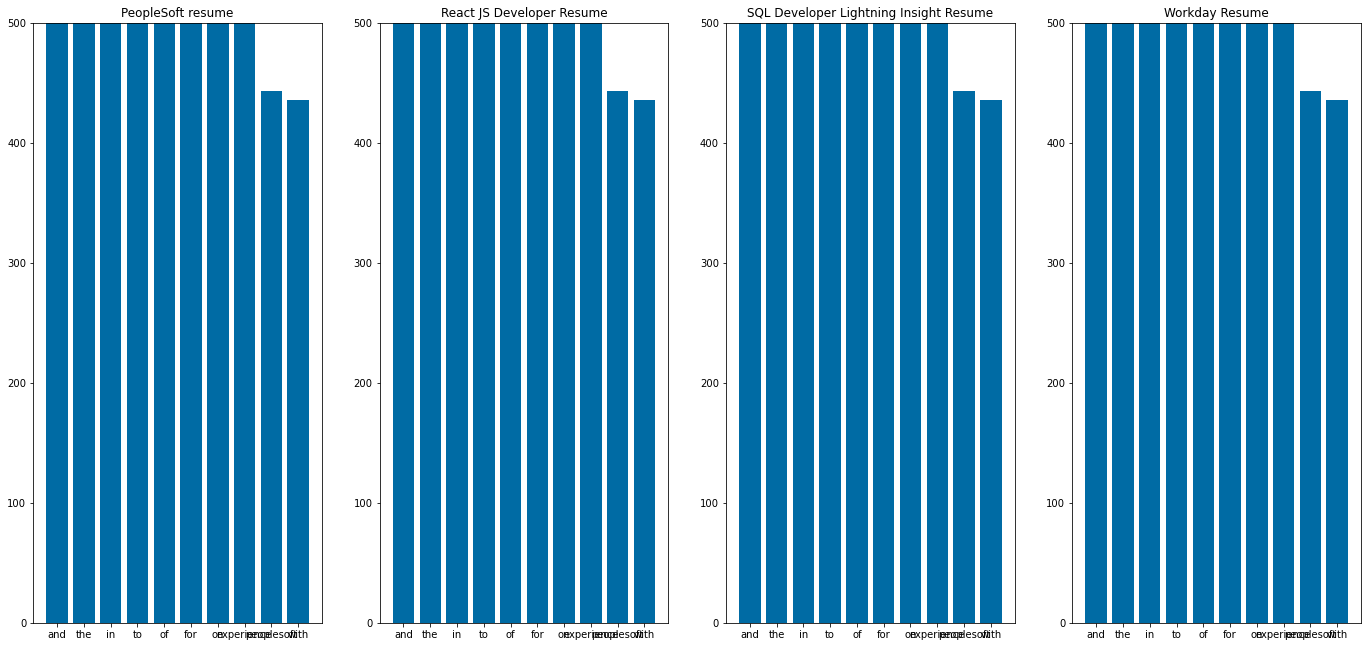

In [60]:
fig = plt.figure(figsize=(30, 64))

for i, category in enumerate(categories):
    wf = frequent_words(data_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

### Applying label encoding on Category of resumes

In [61]:
from sklearn.preprocessing import LabelEncoder

cat_ = ['Resume_category']
le = LabelEncoder()
for i in cat_:
    data[i] = le.fit_transform(data[i])

In [62]:
data

,Resume_category,final_Clean_Resumes
0,1,name ravali p curriculum vitae specialization ...
1,1,susovan bag seeking a challenging position in ...
2,1,kanumuru deepak reddy career objective to secu...
3,1,haripriya battina experience as ui developer i...
4,1,kamalakar reddy a linked in professional summa...
...,...,...
74,3,workday integration consultant name sri krishn...
75,3,srikanth workday hcm consultant seeking suitab...
76,3,workday hcm fcm name kumar ss role workday con...
77,3,venkateswarlub workday consultant having years...


In [63]:
data.Resume_category.value_counts()

1    24
3    21
0    20
2    14
Name: Resume_category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Resume_category'>

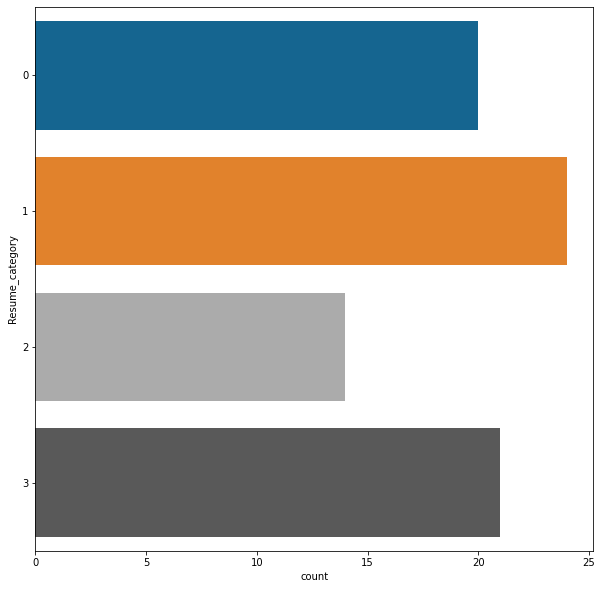

In [64]:
plt.figure(figsize=(10,10))
plt.yticks()
sns.countplot(y="Resume_category", data=data)

In [65]:
target_Counts = data['Resume_category'].value_counts().reset_index()['Resume_category']
target_Labels  = data['Resume_category'].value_counts().reset_index()['index']

In [66]:
target_Counts

0    24
1    21
2    20
3    14
Name: Resume_category, dtype: int64

In [67]:
target_Labels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

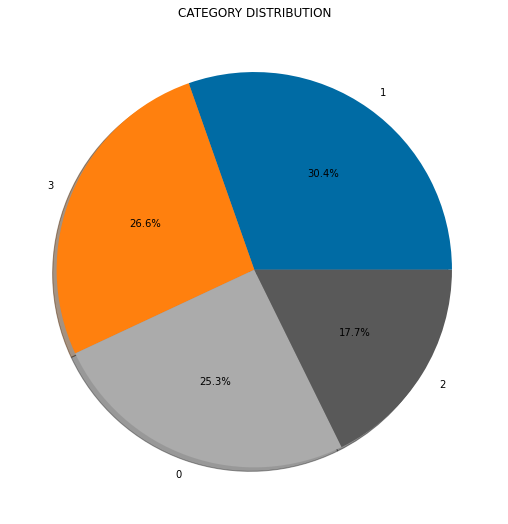

In [68]:
#pie chart or  category distribution graph
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(target_Counts, labels=target_Labels, autopct='%1.1f%%', shadow=True)

### Applyng TF-ID Vectorozer

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
requiredText = data['final_Clean_Resumes'].values
requiredTarget = data['Resume_category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

### Splitting the data in Test and training data

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=45, test_size=0.25,stratify=requiredTarget)
X_train.shape, X_test.shape

((59, 4748), (20, 4748))

## Model Training

In [72]:
# !pip install lightgbm

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### 1) Classification using Random Forest 

In [74]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [75]:
# Test your model on the test dataset and get predicted labels
y_test_pred=rf.predict(X_test)

In [76]:
y_test_pred

array([0, 0, 1, 3, 3, 1, 1, 1, 0, 1, 2, 2, 2, 2, 3, 3, 0, 3, 0, 1])

In [77]:
accuracy_test_rf = accuracy_score(y_test, y_test_pred)
accuracy_test_rf

1.0

In [78]:
# Get predicted labels on the training dataset
y_train_pred = rf.predict(X_train)
y_train_pred

array([0, 1, 0, 3, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 3,
       0, 0, 0, 2, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 2, 3, 0, 0, 2, 0, 3, 2,
       0, 3, 0, 2, 3, 3, 3, 0, 1, 1, 1, 0, 1, 1, 3])

In [79]:
# Calculate the accuracy of your model on the training dataset
accuracy_train_rf = accuracy_score(y_train, y_train_pred)
accuracy_train_rf

1.0

In [80]:
# confusion matrix
cm_rf = confusion_matrix(y_test, y_test_pred)
cm_rf

array([[5, 0, 0, 0],
       [0, 6, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 5]], dtype=int64)

Text(33.0, 0.5, 'Truth')

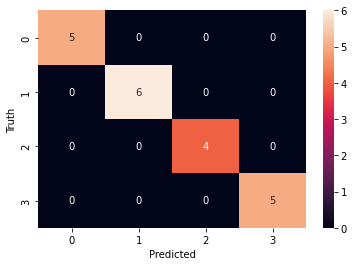

In [81]:
sns.heatmap(cm_rf,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [82]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [83]:

precision = round(precision_score(y_test,y_test_pred,average = 'macro'),4)
recall = round(recall_score(y_test,y_test_pred, average = 'macro'),4)
f1_score = round(f1_score(y_test,y_test_pred, average = 'macro'),4)

print('Training Accuracy Score  : ', accuracy_train_rf)
print('Test Accuracy Score  : ', accuracy_test_rf)
print('Precision Score : ', precision)
print('Recall Score    : ', recall)
print('f1-Score        : ', f1_score)

Training Accuracy Score  :  1.0
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


### 2) Classification using Naive Bayes

In [84]:
nb=MultinomialNB()
nb.fit(X_train,y_train)
y_test_predNB=nb.predict(X_test)

In [85]:
y_test_predNB

array([0, 0, 1, 3, 3, 1, 1, 1, 0, 1, 3, 3, 2, 2, 3, 3, 0, 3, 0, 1])

In [86]:
accuracy_test_NB = accuracy_score(y_test, y_test_predNB)
accuracy_test_NB

0.9

In [87]:
# Get predicted labels on the training dataset
y_train_predNB= nb.predict(X_train)
y_train_predNB

array([0, 1, 0, 3, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 3,
       0, 0, 0, 2, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 2, 3, 0, 0, 2, 0, 3, 2,
       0, 3, 0, 2, 3, 3, 3, 0, 1, 1, 1, 0, 1, 1, 3])

In [88]:
# Calculate the accuracy of your model on the training dataset
accuracy_train_NB = accuracy_score(y_train, y_train_predNB)
accuracy_train_NB

1.0

In [89]:
# confusion matrix
cm_NB = confusion_matrix(y_test, y_test_predNB)
cm_NB

array([[5, 0, 0, 0],
       [0, 6, 0, 0],
       [0, 0, 2, 2],
       [0, 0, 0, 5]], dtype=int64)

Text(33.0, 0.5, 'Truth')

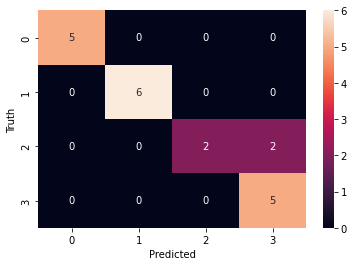

In [90]:
sns.heatmap(cm_NB,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [91]:
print(classification_report(y_test, y_test_predNB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      0.50      0.67         4
           3       0.71      1.00      0.83         5

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.88        20
weighted avg       0.93      0.90      0.89        20



In [92]:
precision = round(precision_score(y_test,y_test_predNB,average = 'macro'),4)
recall = round(recall_score(y_test,y_test_predNB, average = 'macro'),4)


print('Training Accuracy Score  : ', accuracy_train_NB)
print('Test Accuracy Score  : ', accuracy_test_NB)
print('Precision Score : ', precision)
print('Recall Score    : ', recall)


Training Accuracy Score  :  1.0
Test Accuracy Score  :  0.9
Precision Score :  0.9286
Recall Score    :  0.875


### 3) Classification using SVM

In [93]:
sv = SVC()
sv.fit(X_train,y_train)

SVC()

In [94]:
# Test your model on the test dataset and get predicted labels
y_test_predSVC=sv.predict(X_test)
y_test_predSVC

array([1, 0, 1, 3, 3, 1, 1, 1, 0, 1, 2, 1, 2, 2, 3, 3, 0, 3, 0, 1])

In [95]:
accuracy_test_SVC = accuracy_score(y_test, y_test_predSVC)
accuracy_test_SVC

0.9

In [96]:
# Get predicted labels on the training dataset
y_train_predSVC = sv.predict(X_train)
y_train_predSVC

array([0, 1, 0, 3, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 3,
       0, 0, 0, 2, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 2, 3, 0, 0, 2, 0, 3, 2,
       0, 3, 0, 2, 3, 3, 3, 0, 1, 1, 1, 0, 1, 1, 3])

In [97]:
# Calculate the accuracy of your model on the training dataset
accuracy_train_SVC = accuracy_score(y_train, y_train_predSVC)
accuracy_train_SVC

1.0

In [98]:
# confusion matrix
cm_svc = confusion_matrix(y_test, y_test_predSVC)
cm_svc

array([[4, 1, 0, 0],
       [0, 6, 0, 0],
       [0, 1, 3, 0],
       [0, 0, 0, 5]], dtype=int64)

Text(33.0, 0.5, 'Truth')

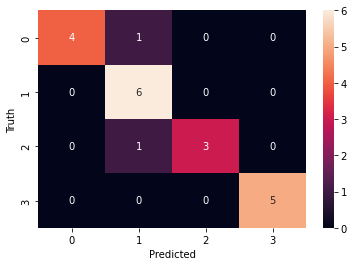

In [99]:
sns.heatmap(cm_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [100]:
print(classification_report(y_test, y_test_predSVC))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      1.00      0.86         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.94      0.89      0.90        20
weighted avg       0.93      0.90      0.90        20



In [101]:
precision = round(precision_score(y_test,y_test_predSVC,average = 'macro'),4)
recall = round(recall_score(y_test,y_test_predSVC, average = 'macro'),4)


print('Training Accuracy Score  : ', accuracy_train_SVC)
print('Test Accuracy Score  : ', accuracy_test_SVC)
print('Precision Score : ', precision)
print('Recall Score    : ', recall)


Training Accuracy Score  :  1.0
Test Accuracy Score  :  0.9
Precision Score :  0.9375
Recall Score    :  0.8875


## 4) Classification using Decision Tree

In [102]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [103]:
# Test your model on the test dataset and get predicted labels
y_test_predDT=dt.predict(X_test)
y_test_predDT

array([0, 0, 1, 3, 3, 1, 1, 1, 0, 1, 2, 2, 2, 2, 3, 3, 0, 3, 0, 1])

In [104]:
accuracy_test_DT = accuracy_score(y_test, y_test_predDT)
accuracy_test_DT

1.0

In [105]:
# Get predicted labels on the training dataset
y_train_predDT = dt.predict(X_train)
y_train_predDT

array([0, 1, 0, 3, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 3,
       0, 0, 0, 2, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 2, 3, 0, 0, 2, 0, 3, 2,
       0, 3, 0, 2, 3, 3, 3, 0, 1, 1, 1, 0, 1, 1, 3])

In [106]:
# Calculate the accuracy of your model on the training dataset
accuracy_train_DT = accuracy_score(y_train, y_train_predDT)                                  
accuracy_train_DT

1.0

In [107]:
# confusion matrix
cm_DT = confusion_matrix(y_test, y_test_predDT)
cm_DT

array([[5, 0, 0, 0],
       [0, 6, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 5]], dtype=int64)

Text(33.0, 0.5, 'Truth')

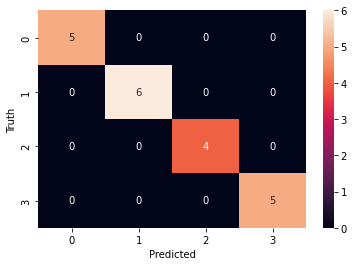

In [108]:
sns.heatmap(cm_DT,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [109]:
print(classification_report(y_test, y_test_predDT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [110]:
precision = round(precision_score(y_test,y_test_predDT,average = 'macro'),4)
recall = round(recall_score(y_test,y_test_predDT, average = 'macro'),4)

print('Training Accuracy Score  : ', accuracy_train_DT)
print('Test Accuracy Score  : ', accuracy_test_DT)
print('Precision Score : ', precision)
print('Recall Score    : ', recall)


Training Accuracy Score  :  1.0
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0


## 5) Classification using Adaboost 

In [111]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)

AdaBoostClassifier()

In [112]:
# Test your model on the test dataset and get predicted labels
y_test_predAD=ab.predict(X_test)
y_test_predAD

array([1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 1, 3, 1, 1])

In [113]:
accuracy_test_ad= accuracy_score(y_test, y_test_predAD)
accuracy_test_ad

0.75

In [114]:
# Get predicted labels on the training dataset
y_train_predAD = ab.predict(X_train)
y_train_predAD

array([1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 3,
       1, 1, 1, 2, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 2, 3, 1, 1, 2, 1, 3, 2,
       1, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3])

In [115]:
# Calculate the accuracy of your model on the training dataset
accuracy_train_ad = accuracy_score(y_train, y_train_predAD)
accuracy_train_ad

0.7457627118644068

In [116]:
# confusion matrix
cm_ad = confusion_matrix(y_test, y_test_predAD)
cm_ad

array([[0, 5, 0, 0],
       [0, 6, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 5]], dtype=int64)

Text(33.0, 0.5, 'Truth')

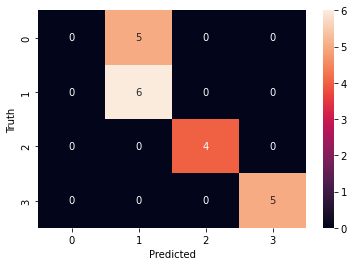

In [117]:
sns.heatmap(cm_ad,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [118]:
print(classification_report(y_test, y_test_predAD))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.55      1.00      0.71         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           0.75        20
   macro avg       0.64      0.75      0.68        20
weighted avg       0.61      0.75      0.66        20



In [119]:
precision = round(precision_score(y_test,y_test_predAD,average = 'macro'),4)
recall = round(recall_score(y_test,y_test_predAD, average = 'macro'),4)

print('Training Accuracy Score  : ', accuracy_train_ad)
print('Test Accuracy Score  : ', accuracy_test_ad)
print('Precision Score : ', precision)
print('Recall Score    : ', recall)


Training Accuracy Score  :  0.7457627118644068
Test Accuracy Score  :  0.75
Precision Score :  0.6364
Recall Score    :  0.75


### 6) Classification using GradientBoosting 

In [120]:
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)

GradientBoostingClassifier()

In [121]:
# Test your model on the test dataset and get predicted labels
y_test_predGD=gd.predict(X_test)
y_test_predGD

array([0, 0, 1, 3, 3, 1, 1, 1, 0, 1, 2, 2, 2, 2, 3, 3, 0, 3, 0, 1])

In [122]:
accuracy_test_gd = accuracy_score(y_test, y_test_predGD)
accuracy_test_gd

1.0

In [123]:
# Get predicted labels on the training dataset
y_train_predGD = gd.predict(X_train)
y_train_predGD

array([0, 1, 0, 3, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 3,
       0, 0, 0, 2, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 2, 3, 0, 0, 2, 0, 3, 2,
       0, 3, 0, 2, 3, 3, 3, 0, 1, 1, 1, 0, 1, 1, 3])

In [124]:
# Calculate the accuracy of your model on the training dataset
accuracy_train_gd = accuracy_score(y_train, y_train_predGD)
accuracy_train_gd

1.0

In [125]:
# confusion matrix
cm_gd = confusion_matrix(y_test, y_test_predGD)
cm_gd

array([[5, 0, 0, 0],
       [0, 6, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 5]], dtype=int64)

Text(33.0, 0.5, 'Truth')

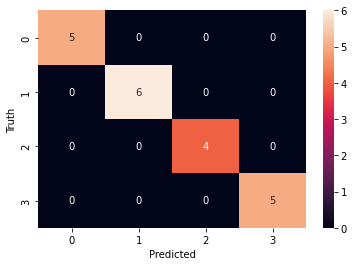

In [126]:
sns.heatmap(cm_gd,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [127]:
print(classification_report(y_test, y_test_predGD))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [128]:
precision = round(precision_score(y_test,y_test_predGD,average = 'macro'),4)
recall = round(recall_score(y_test,y_test_predGD, average = 'macro'),4)

print('Training Accuracy Score  : ', accuracy_train_gd)
print('Test Accuracy Score  : ', accuracy_test_gd)
print('Precision Score : ', precision)
print('Recall Score    : ', recall)


Training Accuracy Score  :  1.0
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0


### 7) Classification using LGBM-Boosting Classifier

In [129]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier()

In [130]:
# Test your model on the test dataset and get predicted labels
y_test_predLGBM=lgbm.predict(X_test)
y_test_predLGBM

array([0, 0, 1, 3, 3, 1, 1, 1, 0, 1, 2, 2, 2, 2, 3, 3, 0, 3, 0, 1])

In [131]:
accuracy_test_lgbm = accuracy_score(y_test, y_test_predLGBM)
accuracy_test_lgbm

1.0

In [132]:
# Get predicted labels on the training dataset
y_train_predLGBM = lgbm.predict(X_train)
y_train_predLGBM

array([0, 1, 0, 3, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 3,
       0, 0, 0, 2, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 2, 3, 0, 0, 2, 0, 3, 2,
       0, 3, 0, 2, 3, 3, 3, 0, 1, 1, 1, 0, 1, 1, 3])

In [133]:
# Calculate the accuracy of your model on the training dataset
accuracy_train_lgbm = accuracy_score(y_train, y_train_predLGBM)
accuracy_train_lgbm

1.0

In [134]:
# confusion matrix
cm_lgbm = confusion_matrix(y_test, y_test_predLGBM)
cm_lgbm

array([[5, 0, 0, 0],
       [0, 6, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 5]], dtype=int64)

Text(33.0, 0.5, 'Truth')

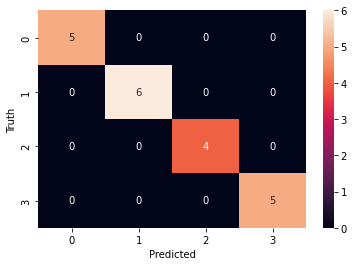

In [135]:
sns.heatmap(cm_lgbm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [136]:
print(classification_report(y_test, y_test_predLGBM))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [137]:
precision = round(precision_score(y_test,y_test_predLGBM,average = 'macro'),4)
recall = round(recall_score(y_test,y_test_predLGBM, average = 'macro'),4)

print('Training Accuracy Score  : ', accuracy_train_lgbm)
print('Test Accuracy Score  : ', accuracy_test_lgbm)
print('Precision Score : ', precision)
print('Recall Score    : ', recall)


Training Accuracy Score  :  1.0
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0


In [142]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 784).astype("float32") / 255.0
X_test = X_test.reshape(X_train.shape[0], 784).astype("float32") / 255.0

# Define the model
ann = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10)
])

# Compile the model
ann.compile(
    optimizer=keras.optimizers.Adam(0.01),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# Train the model
ann.fit(X_train, y_train, epochs=5, batch_size=32, verbose=2)



ValueError: cannot reshape array of size 280132 into shape (59, 784)

In [ ]:
# Test your model on the test dataset and get predicted labels
y_test_predANN=ann.predict(X_test)
y_test_predANN

In [ ]:
accuracy_test_ann = accuracy_score(y_test, y_test_predANN)
accuracy_test_ann

In [ ]:
# Get predicted labels on the training dataset
y_train_predANN = ann.predict(X_train)
y_train_predANN

In [ ]:
# Calculate the accuracy of your model on the training dataset
accuracy_train_ann = accuracy_score(y_train, y_train_predANN)
accuracy_train_ann

## Craeting Data Frame to show all ML models and their Perfomance

In [139]:
all_model = {'Classifier' : ['Random Forest Classifier', 'Naive-Bayes Classifier', 'SVM Classifier', 'Decision Tree Classifier',
                         'AdaBoost Classifier', 'Gradient Boosting Classifier','Light Gradient Boosting Classifier'],
         'Training_Accuracy' : [accuracy_train_rf, accuracy_train_NB, accuracy_train_SVC, accuracy_train_DT, accuracy_train_ad,
                                accuracy_train_gd, accuracy_train_lgbm], 
         'Test_Accuracy' : [accuracy_test_rf, accuracy_test_NB, accuracy_test_SVC, accuracy_test_DT, accuracy_test_ad,
                                accuracy_test_gd, accuracy_test_lgbm]
         
         }
all_model = pd.DataFrame(all_model)
all_model.sort_values(["Test_Accuracy"],inplace = True, ignore_index=True)
all_model

,Classifier,Training_Accuracy,Test_Accuracy
0,AdaBoost Classifier,0.745763,0.75
1,Naive-Bayes Classifier,1.000000,0.90
2,SVM Classifier,1.000000,0.90
3,Random Forest Classifier,1.000000,1.00
4,Decision Tree Classifier,1.000000,1.00
5,Gradient Boosting Classifier,1.000000,1.00
6,Light Gradient Boosting Classifier,1.000000,1.00


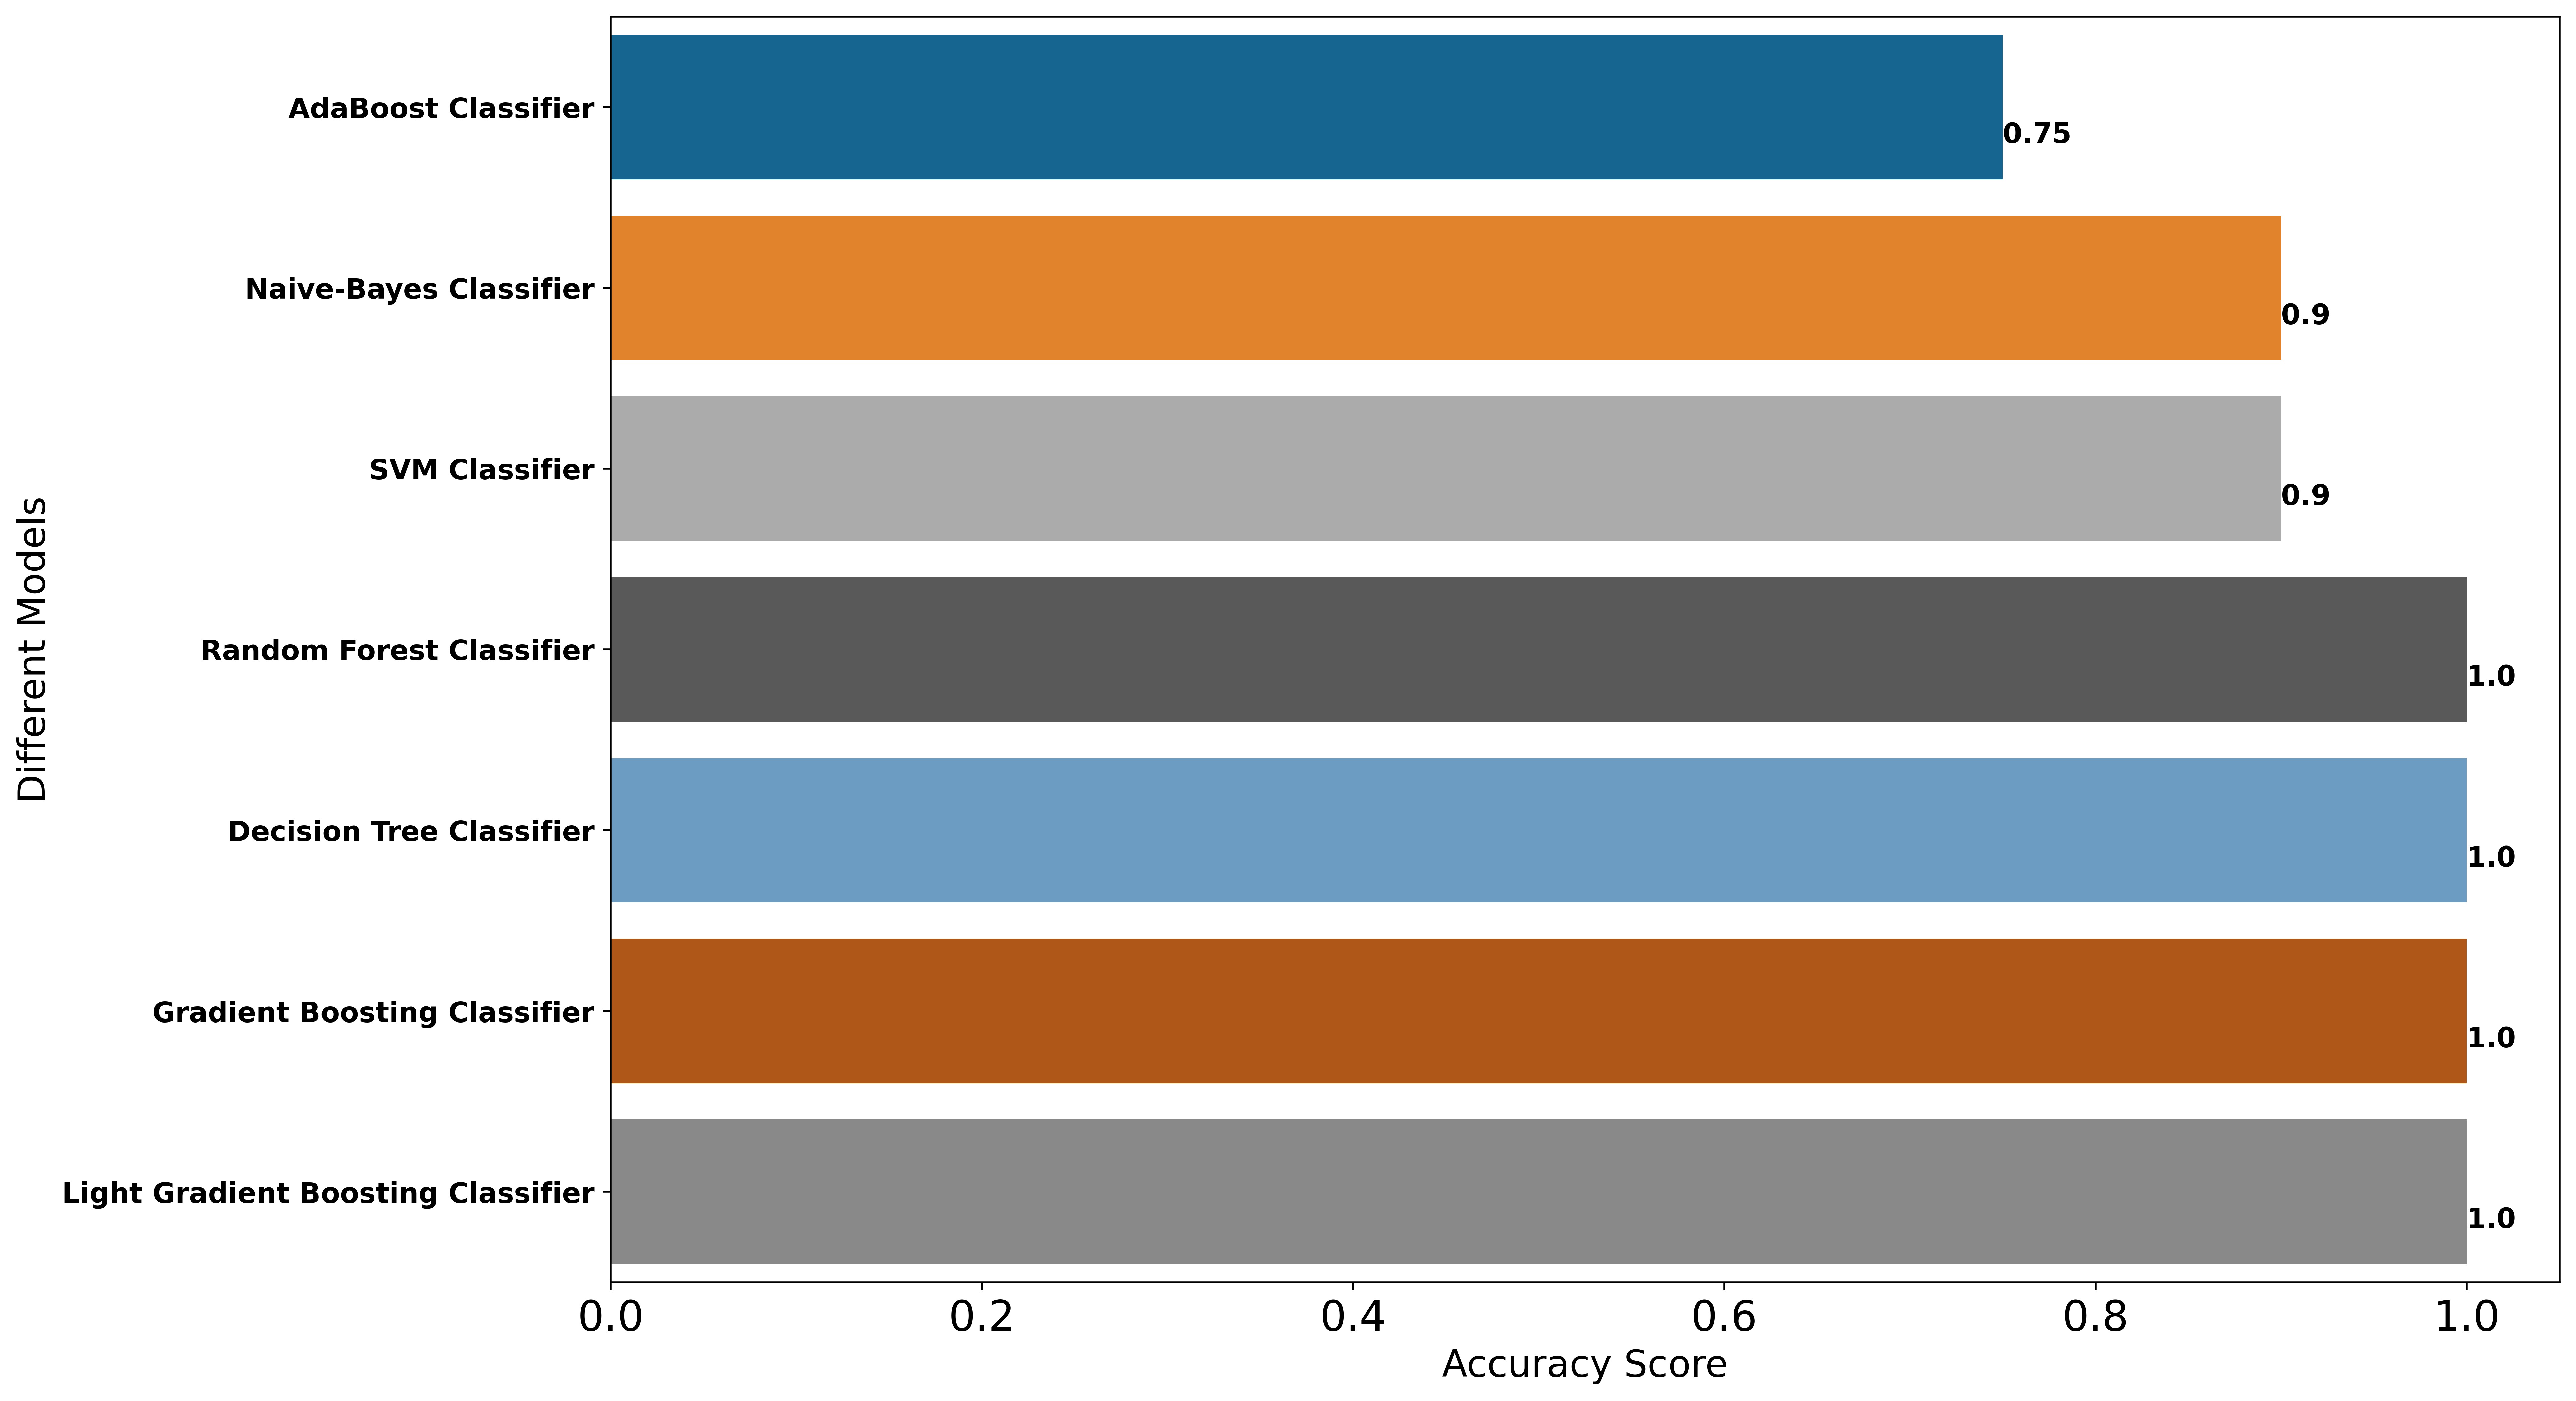

In [140]:
f,axe = plt.subplots(figsize=(15,10),dpi=500)
sns.barplot(x='Test_Accuracy', y='Classifier', data=all_model, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Different Models', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(all_model.Test_Accuracy.values,2)):
    axe.text(v + 0, i + .2, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()